In [1]:
suppressPackageStartupMessages(suppressWarnings(library(ggplot2)))
suppressPackageStartupMessages(suppressWarnings(library(dplyr)))
suppressPackageStartupMessages(suppressWarnings(library(tidyr)))
suppressPackageStartupMessages(suppressWarnings(library(shiny)))

In [2]:
# set UMAP df path
umap_df_path <- file.path("..","..","1.scDINO_run/outputdir/test_run/CLS_features/CLS_features_annotated_umap.csv")
# load UMAP df
umap_df <- read.csv(umap_df_path)
head(umap_df,2)

,X,Metadata_image_path,Metadata_Well,Metadata_FOV,Metadata_Time,Metadata_Channel,Metadata_Cell_id,Metadata_compound,Metadata_dose,Metadata_control,UMAP1,UMAP2
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<chr>,<dbl>,<dbl>
1,0,/home/lippincm/Documents/4TB/data/live_cell_timelapse_apoptosis_analysis/data/processed_images/crops/C-02/C-02_F0001_T0001_Z0001_C01_illumcorrect_100_crop.tiff,C-02,F0001,T0001,C01,100,Staurosporine,0,negative,-0.4125221,5.1737447
2,1,/home/lippincm/Documents/4TB/data/live_cell_timelapse_apoptosis_analysis/data/processed_images/crops/C-02/C-02_F0001_T0001_Z0001_C01_illumcorrect_101_crop.tiff,C-02,F0001,T0001,C01,101,Staurosporine,0,negative,-2.1291962,0.5885567


In [3]:
# get all wells
unique(umap_df$Metadata_Well)

[1] "C-02" "C-03" "C-04" "C-05" "C-06" "C-07" "C-08" "C-09" "C-10" "C-11"
[11] "D-02" "D-03" "D-04" "D-05" "D-06" "D-07" "D-08" "D-09" "D-10" "D-11"
[21] "E-02" "E-03" "E-04" "E-05" "E-06" "E-07" "E-08" "E-09" "E-10" "E-11"

In [4]:
# select just one well
# umap_df <- umap_df %>% filter(Metadata_Well == "E-11")
# remove the T from the time column
umap_df$Metadata_Time <- gsub("T","",umap_df$Metadata_Time)
# convert to numeric
umap_df$Metadata_Time <- as.numeric(umap_df$Metadata_Time)


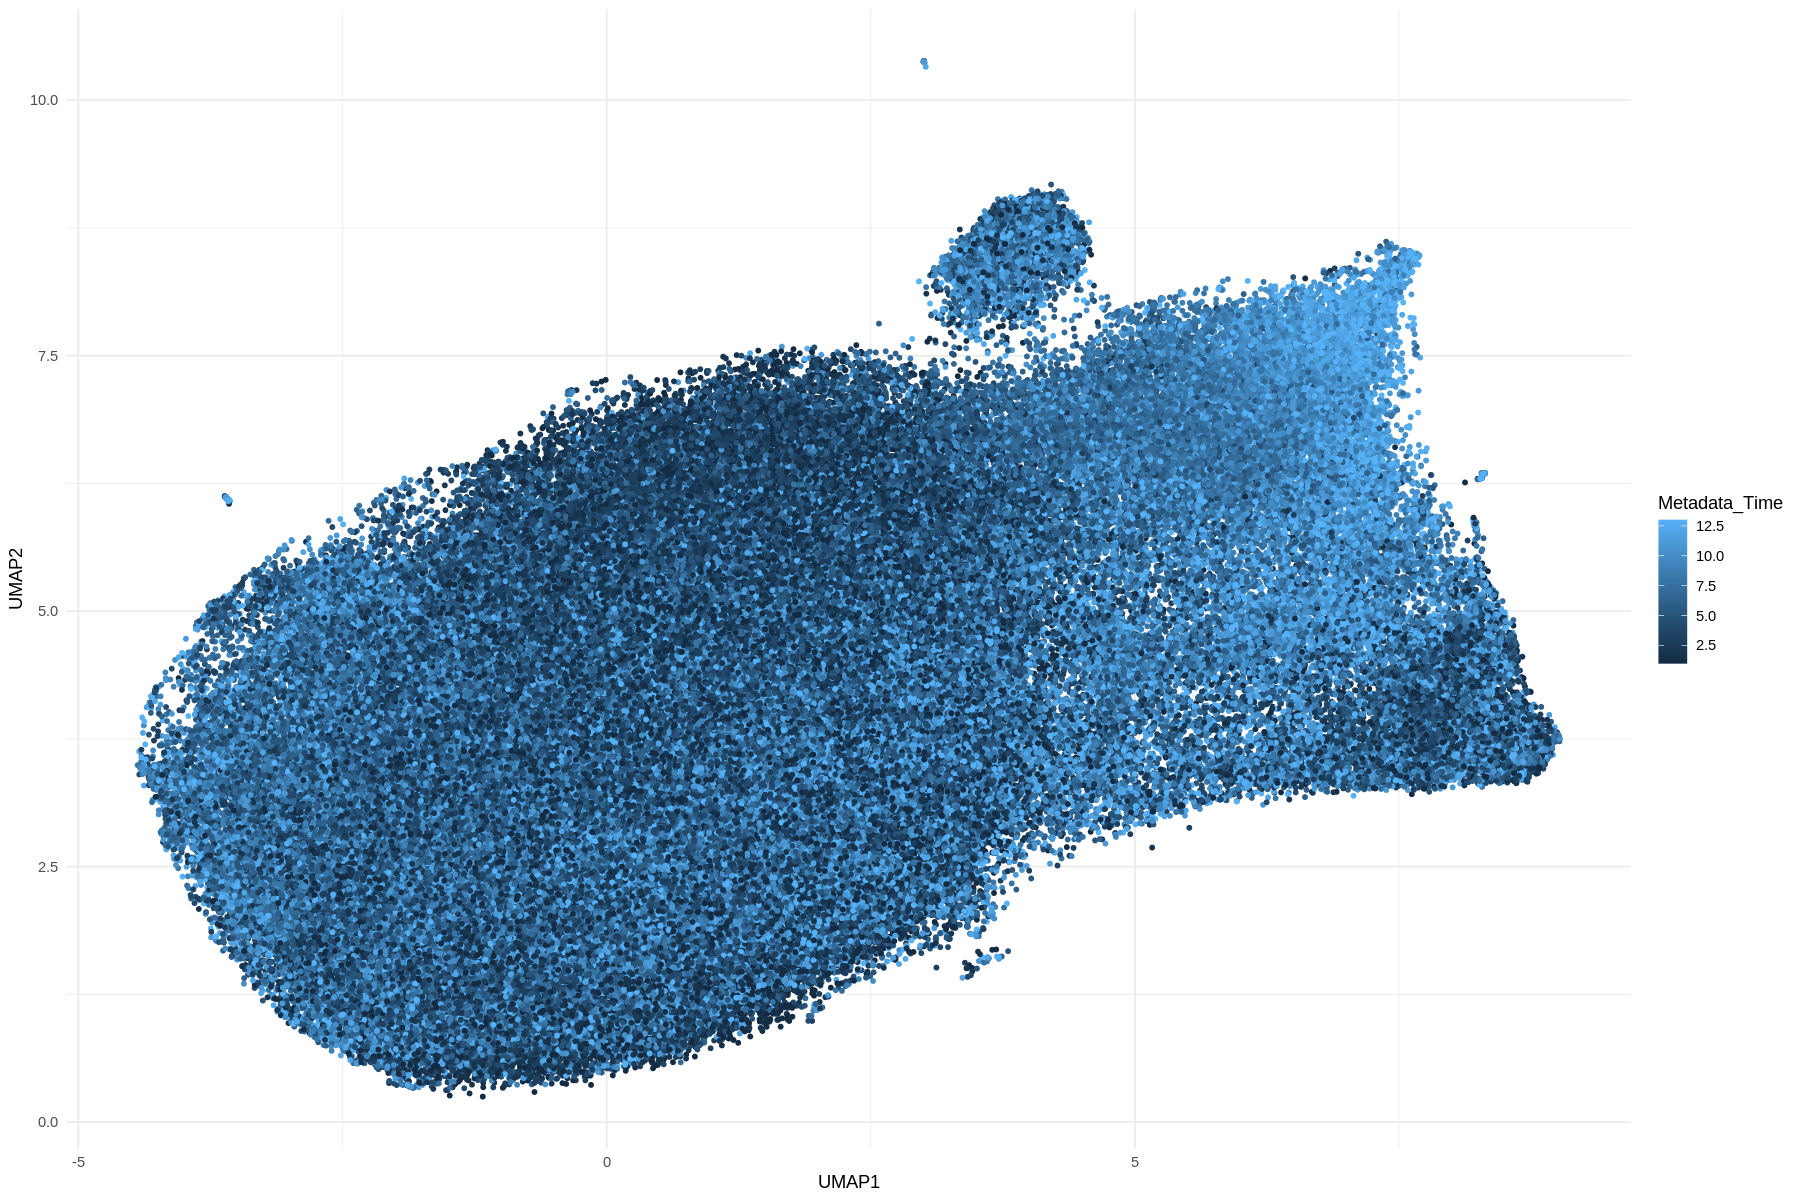

In [5]:
# plot UMAP
width <- 15
height <- 10
options(repr.plot.width = width, repr.plot.height = height)
umap_plot <- (
    ggplot(umap_df, aes(x = UMAP1, y = UMAP2, color = Metadata_Time))
    + geom_point(size = 1)
    + theme_minimal()
    + theme(legend.position = "right")
)
umap_plot